In [1]:
from google.colab import files
dataset = files.upload()

Saving trainset.txt to trainset.txt


In [ ]:
!wget https://www.python.org/ftp/python/3.7.0/Python-3.7.0.tgz
!tar xvfz Python-3.7.0.tgz
!Python-3.7.0/configure
!make
!sudo make install

In [ ]:
!pip uninstall -y keras
!pip uninstall -y tensorflow
!pip install tensorflow==2.8.0
!pip install keras==2.8.0


#!pip install h5py==2.10.0

In [ ]:
!pip install tensorflow-gpu==2.8.0

In [ ]:
!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

In [ ]:
!uninstall -y h5py
!pip install h5py==3.7.0

In [7]:
import h5py

h5py.__version__

'3.7.0'

In [8]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical


In [9]:
data = pd.read_csv("trainset.txt", names=['src', 'tag'], sep="\t")
data = data.reset_index()
data

<ipython-input-9-adf15661203a>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("trainset.txt", names=['src', 'tag'], sep="\t")


,index,src,tag
0,1,우리,O
1,1,연세대학교,B_LOC_pos
2,1,신촌캠퍼스,I_LOC_pos
3,1,제,I_LOC_pos
4,1,4,I_LOC_pos
...,...,...,...
766813,48973,창업,I_LOC_pos
766814,48973,보육,I_LOC_pos
766815,48973,센터,I_LOC_pos
766816,48973,로,O


In [10]:
data[:5]

,index,src,tag
0,1,우리,O
1,1,연세대학교,B_LOC_pos
2,1,신촌캠퍼스,I_LOC_pos
3,1,제,I_LOC_pos
4,1,4,I_LOC_pos


In [11]:
data.keys()

Index(['index', 'src', 'tag'], dtype='object')

In [12]:
len(data)

766818

<Axes: xlabel='tag'>

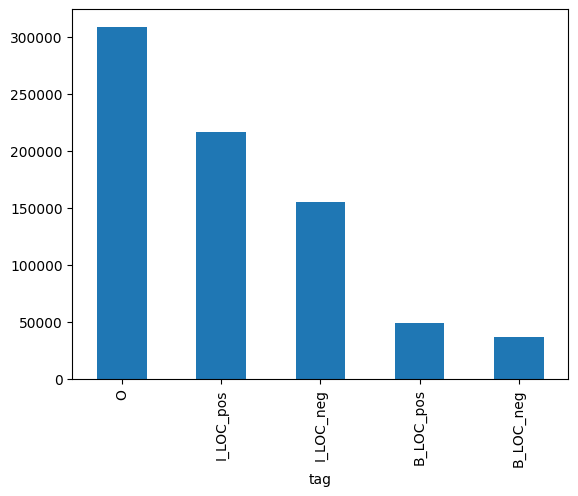

In [13]:
data['tag'].value_counts().plot(kind = 'bar')

In [14]:
data.groupby('tag').size().reset_index(name='count')

,tag,count
0,B_LOC_neg,36889
1,B_LOC_pos,49211
2,I_LOC_neg,155026
3,I_LOC_pos,216837
4,O,308854


In [15]:
func = lambda temp: [(w, t) for w, t in zip(temp["src"].values.tolist(), temp["tag"].values.tolist())]
tagged_sentences=[t for t in data.groupby("index").apply(func)]

In [16]:
sentences, ner_tags = [], []
for tagged_sentence in tagged_sentences:
    sentence, tag_info = zip(*tagged_sentence)
    sentences.append(list(sentence))
    ner_tags.append(list(tag_info))

In [17]:
tagged_sentences[1000]

[('나', 'O'),
 ('는', 'O'),
 ('숭실대', 'B_LOC_pos'),
 ('학교', 'I_LOC_pos'),
 ('학생', 'I_LOC_pos'),
 ('회관', 'I_LOC_pos'),
 ('에', 'O'),
 ('갈래', 'O')]

In [18]:
sentences[1]
#ner_tags[0]

['우리', '서울대학교', '관악', '캠퍼스', '예술', '관', '에', '가고', '싶어요']

In [19]:
ner_tags[1]

['O',
 'B_LOC_pos',
 'I_LOC_pos',
 'I_LOC_pos',
 'I_LOC_pos',
 'I_LOC_pos',
 'O',
 'O',
 'O']

In [20]:
sentences[1],
ner_tags[1]

['O',
 'B_LOC_pos',
 'I_LOC_pos',
 'I_LOC_pos',
 'I_LOC_pos',
 'I_LOC_pos',
 'O',
 'O',
 'O']

In [21]:
src_tokenizer = Tokenizer(filters=None, lower=False)###
tar_tokenizer = Tokenizer(filters=None, lower=False)####
src_tokenizer = Tokenizer(oov_token='OOV')
src_tokenizer.fit_on_texts(sentences)
tar_tokenizer = Tokenizer(lower=False)
tar_tokenizer.fit_on_texts(ner_tags)

In [22]:
import pickle

# 저장할 파일 이름
tokenizer_filename = "src_tokenizer.pickle"

# src_tokenizer를 파일에 저장
with open(tokenizer_filename, 'wb') as handle:
    pickle.dump(src_tokenizer, handle, protocol=4)

print(f"src_tokenizer가 {tokenizer_filename} 파일에 저장되었습니다.")

src_tokenizer가 src_tokenizer.pickle 파일에 저장되었습니다.


In [23]:
vocab_size = len(src_tokenizer.word_index) + 1
tag_size = len(tar_tokenizer.word_index) + 1
print('단어 집합의 크기 : {}'.format(vocab_size))
print('개체명 태깅 정보 집합의 크기 : {}'.format(tag_size))

단어 집합의 크기 : 406
개체명 태깅 정보 집합의 크기 : 7


In [24]:
print('단어 OOV의 인덱스 : {}'.format(src_tokenizer.word_index['OOV']))

단어 OOV의 인덱스 : 1


In [25]:
X_data = src_tokenizer.texts_to_sequences(sentences)
y_data = tar_tokenizer.texts_to_sequences(ner_tags)

In [26]:
print(X_data[10000])
print(y_data[10000])

[12, 47, 7, 32, 19, 53, 4, 96, 2, 14, 50, 13, 10, 8, 65, 66, 67]
[1, 5, 1, 1, 1, 4, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1]


In [27]:
word_to_index = src_tokenizer.word_index
index_to_word = src_tokenizer.index_word
ner_to_index = tar_tokenizer.word_index
index_to_ner = tar_tokenizer.index_word
index_to_ner[0] = 'PAD'

In [28]:
print(index_to_ner)

{1: 'O', 2: 'I_LOC_pos', 3: 'I_LOC_neg', 4: 'B_LOC_pos', 5: 'B_LOC_neg', 6: nan, 0: 'PAD'}


In [29]:
decoded = []
for index in X_data[30000] : # 첫번째 샘플 안의 인덱스들에 대해서
    decoded.append(index_to_word[index]) # 다시 단어로 변환

print('기존의 문장 : {}'.format(sentences[30000]))
print('디코딩 문장 : {}'.format(decoded))

기존의 문장 : ['나', '는', '성균관대', '학교', '자연과학', '캠퍼스', '생명공학', '관', '에', '갈', '예정', '이야', '연세대학교', '신촌캠퍼스', '의학', '도서관', '는', '경유', '하지', '않', '을', '겁니다']
디코딩 문장 : ['나', '는', '성균관대', '학교', '자연과학', '캠퍼스', '생명공학', '관', '에', '갈', '예정', '이야', '연세대학교', '신촌캠퍼스', '의학', '도서관', '는', '경유', '하지', '않', '을', '겁니다']


In [30]:
max_len = 32
# 모든 샘플들의 길이를 맞출 때 뒤의 공간에 숫자 0으로 채움.
X_data = pad_sequences(X_data, padding='post', maxlen=max_len)
y_data = pad_sequences(y_data, padding='post', maxlen=max_len)

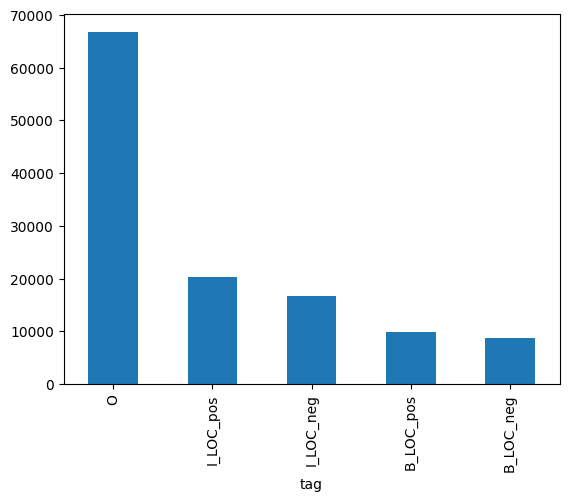

In [31]:
data_ = pd.read_csv("validation_set.txt", names=['src', 'tag'], sep="\t")
data_ = data_.reset_index()


data_[:5]
data_.keys()
len(data_)
data_['tag'].value_counts().plot(kind = 'bar')
data_.groupby('tag').size().reset_index(name='count')
func = lambda temp: [(w, t) for w, t in zip(temp["src"].values.tolist(), temp["tag"].values.tolist())]
tagged_sentences_=[t for t in data_.groupby("index").apply(func)]
sentences_, ner_tags_ = [], []
for tagged_sentence in tagged_sentences_:
    sentence, tag_info = zip(*tagged_sentence)
    sentences_.append(list(sentence))
    ner_tags_.append(list(tag_info))

tagged_sentences_[1000]
ner_tags_[1]

X_data_ = src_tokenizer.texts_to_sequences(sentences)
y_data_ = tar_tokenizer.texts_to_sequences(ner_tags)
max_len = 32
# 모든 샘플들의 길이를 맞출 때 뒤의 공간에 숫자 0으로 채움.
X_data_ = pad_sequences(X_data_, padding='post', maxlen=max_len)
y_data_ = pad_sequences(y_data_, padding='post', maxlen=max_len)


In [32]:
X_data_ = src_tokenizer.texts_to_sequences(sentences_)
y_data_ = tar_tokenizer.texts_to_sequences(ner_tags_)
X_data_ = pad_sequences(X_data_, padding='post', maxlen=max_len)
y_data_ = pad_sequences(y_data_, padding='post', maxlen=max_len)

In [ ]:
print(X_data[100])
print(y_data[100])
print(X_data_[1000])
print(y_data_[1000])

In [34]:
'''
수정하기
'''
X_train = X_data
y_train = y_data

X_test = X_data_
y_test = y_data_

y_train = to_categorical(y_train, num_classes=tag_size)
y_test = to_categorical(y_test, num_classes=tag_size)

In [35]:
print('훈련 샘플 문장의 크기 : {}'.format(X_train.shape))
print('훈련 샘플 레이블의 크기 : {}'.format(y_train.shape))
print('테스트 샘플 문장의 크기 : {}'.format(X_test.shape))
print('테스트 샘플 레이블의 크기 : {}'.format(y_test.shape))

훈련 샘플 문장의 크기 : (48974, 32)
훈련 샘플 레이블의 크기 : (48974, 32, 7)
테스트 샘플 문장의 크기 : (9986, 32)
테스트 샘플 레이블의 크기 : (9986, 32, 7)


In [ ]:
!pip install seqeval

In [37]:
from keras.callbacks import Callback
from seqeval.metrics import f1_score, classification_report

In [38]:
class F1score(Callback):
    def __init__(self, value = 0.0, use_char=True):
        super(F1score, self).__init__()
        self.value = value
        self.use_char = use_char

    def sequences_to_tags(self, sequences): # 예측값을 index_to_ner를 사용하여 태깅 정보로 변경하는 함수.
      result = []
      for sequence in sequences: # 전체 시퀀스로부터 시퀀스를 하나씩 꺼낸다.
          tag = []
          for pred in sequence: # 시퀀스로부터 예측값을 하나씩 꺼낸다.
              pred_index = np.argmax(pred) # 예를 들어 [0, 0, 1, 0 ,0]라면 1의 인덱스인 2를 리턴한다.
              tag.append(index_to_ner[pred_index].replace("PAD", "O")) # 'PAD'는 'O'로 변경
          result.append(tag)
      return result

    # 에포크가 끝날 때마다 실행되는 함수
    def on_epoch_end(self, epoch, logs=None):
      model.save('/content/NLP_model.h5', overwrite=True)


      if self.validation_data is None:
        return

      # char Embedding을 사용하는 경우
      if self.use_char:
        X_test = self.validation_data[0]
        X_char_test = self.validation_data[1]
        y_test = self.validation_data[2]
        y_predicted = self.model.predict([X_test, X_char_test])

      else:
        X_test = self.validation_data[0]
        y_test = self.validation_data[1]
        y_predicted = self.model.predict([X_test])

      pred_tags = self.sequences_to_tags(y_predicted)
      test_tags = self.sequences_to_tags(y_test)

      score = f1_score(pred_tags, test_tags)
      print(' - f1: {:04.2f}'.format(score * 100))
      print(classification_report(test_tags, pred_tags))

      # F1-score가 지금까지 중 가장 높은 경우
      try:
        model.save('/content/ai_model.h5', overwrite=True)
        self.value = score
        #print('f1_score improved from %f to %f, saving model to best_model.h5'%(self.value, score))
        #self.model.save('ai_model.h5', overwrite=True)
        #self.value = score
      except Exception as e:
        print("Error during model saving: ", str(e))


In [39]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, InputLayer, Bidirectional, TimeDistributed, Embedding
from tensorflow.keras.optimizers import Adam
from keras.models import load_model


In [40]:
import keras
keras.__version__

'2.8.0'

In [41]:
model = Sequential()
model.add(Embedding(vocab_size, 64, input_length=max_len, mask_zero=True))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(TimeDistributed(Dense(tag_size, activation=('softmax'))))
model.compile(loss='categorical_crossentropy', optimizer=Adam(0.00005), metrics=['accuracy'])

In [42]:
for epoch in range(1, 10):  # 1부터 3까지의 epoch에 대해
    print(f"Epoch {epoch}/{10}")
    history = model.fit(X_train, y_train, batch_size=64, epochs=1, validation_split=0, shuffle=True , callbacks=[F1score()])
    # 모델 평가
    score = model.evaluate(X_test, y_test, verbose=0)
    print("Test accuracy:", score[1])


Epoch 1/10
766/766 [==============================] - 76s 87ms/step - loss: 0.7172 - accuracy: 0.4859
Test accuracy: 0.6841380000114441
Epoch 2/10
766/766 [==============================] - 65s 85ms/step - loss: 0.3445 - accuracy: 0.8174
Test accuracy: 0.8028787970542908
Epoch 3/10
766/766 [==============================] - 60s 78ms/step - loss: 0.1035 - accuracy: 0.9586
Test accuracy: 0.8815609216690063
Epoch 4/10
766/766 [==============================] - 62s 81ms/step - loss: 0.0467 - accuracy: 0.9842
Test accuracy: 0.9111809134483337
Epoch 5/10
766/766 [==============================] - 63s 82ms/step - loss: 0.0276 - accuracy: 0.9918
Test accuracy: 0.9150872826576233
Epoch 6/10
766/766 [==============================] - 60s 78ms/step - loss: 0.0191 - accuracy: 0.9943
Test accuracy: 0.917207658290863
Epoch 7/10
766/766 [==============================] - 64s 83ms/step - loss: 0.0146 - accuracy: 0.9955
Test accuracy: 0.9188631772994995
Epoch 8/10
766/766 [=============================

In [43]:
bilstm_model = load_model('NLP_model.h5')

In [44]:
i=4000 # 확인하고 싶은 테스트용 샘플의 인덱스.
y_predicted = bilstm_model.predict(np.array([X_test[i]])) # 입력한 테스트용 샘플에 대해서 예측 y를 리턴
y_predicted = np.argmax(y_predicted, axis=-1) # 원-핫 인코딩을 다시 정수 인코딩으로 변경함.
true = np.argmax(y_test[i], -1) # 원-핫 인코딩을 다시 정수 인코딩으로 변경함.

print("{:15}|{:5}|{}".format("단어", "실제값", "예측값"))
print(35 * "-")

for w, t, pred in zip(X_test[i], true, y_predicted[0]):
    if w != 0: # PAD값은 제외함.
        print("{:17}: {:7} {}".format(index_to_word[w], index_to_ner[t], index_to_ner[pred]))

단어             |실제값  |예측값
-----------------------------------
경                : B_LOC_neg B_LOC_neg
상관               : I_LOC_neg I_LOC_neg
경유               : O       O
하지               : O       O
않고               : O       O
디자인              : B_LOC_pos B_LOC_pos
연                : I_LOC_pos I_LOC_pos
구관               : I_LOC_pos I_LOC_pos
에                : O       O
가고               : O       O
싶습니다             : O       O


In [45]:
import keras

In [46]:
setence = '나 대운동장 가도 될까요'

y_predicted = bilstm_model.predict(np.array([X_test[i]]))

In [47]:
print(np.array([X_test[i]]))

[[101 235  20  21  19 102 139 220   8   5  22   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0]]


In [48]:
from konlpy.tag import Okt, Mecab

string = "나 1공학관 가지 않고 학생회관 가고 싶어"
okt = Okt()
okt.morphs(string)

['나', '1', '공', '학관', '가지', '않고', '학생', '회관', '가고', '싶어']

In [49]:
random_sequence = okt.morphs(string)
X_random = src_tokenizer.texts_to_sequences([random_sequence])
X_random = pad_sequences(X_random, padding='post', maxlen=max_len)

# 예측 수행
y_random_predicted = bilstm_model.predict(np.array(X_random))
y_random_predicted = np.argmax(y_random_predicted, axis=-1)

np.array([y_random_predicted])
y_random_predicted = y_random_predicted[0]

print(y_random_predicted)

print(random_sequence[1])

answer_neg = ""
answer_pos = ""
for word, idx in zip(random_sequence, y_random_predicted):
    if idx == 3 or idx == 5:
        answer_neg += word
    elif idx == 4 or idx == 2:
        answer_pos += word

print(answer_neg)
print(answer_pos)

[1 5 3 3 1 1 4 2 1 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
1
1공학관
학생회관
